In [1]:
%matplotlib inline
%watermark -dtv -p numpy,matplotlib,pandas

plt.style.use('ggplot')

2017-04-22 13:01:37 

CPython 3.6.1
IPython 6.0.0

numpy 1.12.1
matplotlib 2.0.0
pandas 0.19.2


# Usage

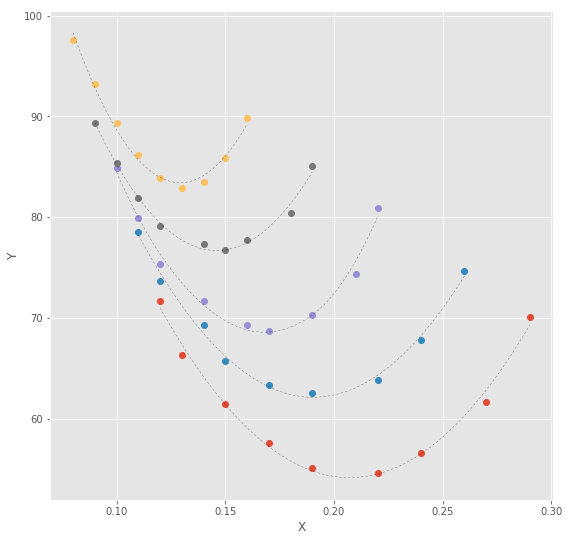

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.array([[0.12, 0.11, 0.1, 0.09, 0.08],
              [0.13, 0.12, 0.11, 0.1, 0.09],
              [0.15, 0.14, 0.12, 0.11, 0.1],
              [0.17, 0.15, 0.14, 0.12, 0.11],
              [0.19, 0.17, 0.16, 0.14, 0.12],
              [0.22, 0.19, 0.17, 0.15, 0.13],
              [0.24, 0.22, 0.19, 0.16, 0.14],
              [0.27, 0.24, 0.21, 0.18, 0.15],
              [0.29, 0.26, 0.22, 0.19, 0.16]])


y = np.array([[71.64, 78.52, 84.91, 89.35, 97.58],
              [66.28, 73.67, 79.87, 85.36, 93.24],
              [61.48, 69.31, 75.36, 81.87, 89.35],
              [57.61, 65.75, 71.7, 79.1, 86.13],
              [55.12, 63.34, 69.32, 77.29, 83.88],
              [54.58, 62.54, 68.7, 76.72, 82.92],
              [56.58, 63.87, 70.3, 77.69, 83.53],
              [61.67, 67.79, 74.41, 80.43, 85.86],
              [70.08, 74.62, 80.93, 85.06, 89.84]])


plt.figure(figsize = (9, 9))
plt.subplot(111)
for i in range(5):
    x_val = np.linspace(x[0, i], x[-1, i], 100)
    x_int = np.interp(x_val, x[:, i], y[:, i])
    tck = interpolate.splrep(x[:, i], y[:, i], k = 2, s = 4)
    y_int = interpolate.splev(x_val, tck, der = 0)
    plt.plot(x[:, i], y[:, i], linestyle = '', marker = 'o')
    plt.plot(x_val, y_int, linestyle = ':', linewidth = 0.25, color =  'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## mesh1d

In [10]:
A = mesh1d([1, 2, 3, 4, 5])

In [11]:
A

0,1,2,3,4
1,2,3,4,5


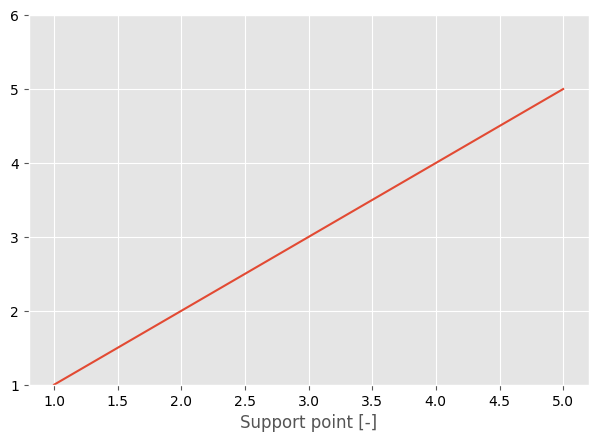

In [12]:
A.plot()

## mesh2d

In [13]:
from numpy.core.multiarray import interp

In [14]:
# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
test2 = mesh2d(x, y)
x2 = np.arange(0,60)
test = mesh2d(x2, np.sin(x2), x_label="Mon label", y_unit="%")

In [15]:
%timeit test2(range(10), assume_sorted=True)

173 µs ± 2.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
test.options = {'extrapolate': False}

In [17]:
test.__dict__

{'_gradient': None,
 '_steps': x = mesh1d(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59], label="Mon label", unit="None")
 y = mesh1d(data=[ 0.  ,  0.84,  0.91,  0.14, -0.76, -0.96, -0.28,  0.66,  0.99,
         0.41, -0.54, -1.  , -0.54,  0.42,  0.99,  0.65, -0.29, -0.96,
        -0.75,  0.15,  0.91,  0.84, -0.01, -0.85, -0.91, -0.13,  0.76,
         0.96,  0.27, -0.66, -0.99, -0.4 ,  0.55,  1.  ,  0.53, -0.43,
        -0.99, -0.64,  0.3 ,  0.96,  0.75, -0.16, -0.92, -0.83,  0.02,
         0.85,  0.9 ,  0.12, -0.77, -0.95, -0.26,  0.67,  0.99,  0.4 ,
        -0.56, -1.  , -0.52,  0.44,  0.99,  0.64], label="None", unit="%"),
 'options': {'extrapolate': False},
 'x': mesh1d(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 

In [18]:
a = np.empty((len([23, 34, 45])), dtype=test.y.dtype)

In [19]:
a.dtype

dtype('float64')

In [20]:
np.insert(a,0, [12, 56])

array([ 12.,  56.,   0.,   0.,   1.])

In [21]:
(test + test2)

x = mesh1d(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], label="None", unit="None")
y = mesh1d(data=[  5.  ,   6.84,   7.91,   2.14,   3.24,   4.04,   5.72,   7.66,
         8.99,   9.41,   9.46,  10.  ,  11.46,  13.42,  14.99,  15.65,
        15.71,  16.04,  17.25,  19.15,  20.91,  21.84,  21.99,  22.15,
        23.09,  24.87,  26.76,  27.96,  28.27,  28.34,  29.01,  30.6 ,
        32.55,  34.  ,  34.53,  34.57,  35.01,  36.36,  38.3 ,  39.96,
        40.75,  40.84,  41.08,  42.17,  44.02,  45.85,  46.9 ,  47.12,
        47.23,  48.05,  49.74,  51.67,  52.99,  53.4 ,  53.44,  54.  ,
        55.48,  57.44,  58.99,  59.64], label="None", unit="None")

In [22]:
test[-3:] + test[:4]

x = mesh1d(data=[ 0,  1,  2,  3, 57, 58, 59], label="None", unit="None")
y = mesh1d(data=[-31.3 , -29.9 , -29.27, -29.48, -40.9 , -41.12, -42.24], label="None", unit="None")

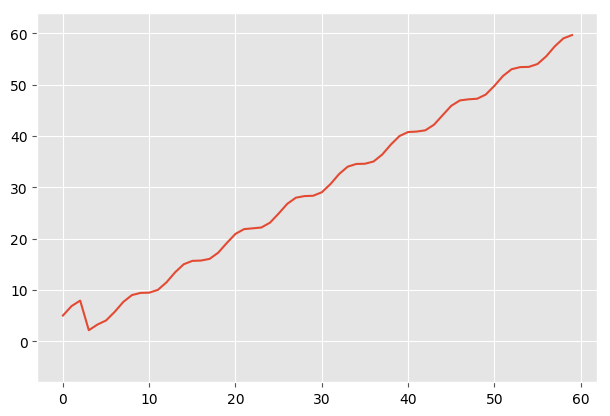

In [23]:
(test + test2).plot()
plt.show()

In [24]:
x = np.arange(10)
condlist = [x<3]
choicelist = [x]
np.select([x<3], [x])

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0])

In [25]:
test.steps

x = mesh1d(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], label="Mon label", unit="None")
y = mesh1d(data=[ 0.  ,  0.84,  0.91,  0.14, -0.76, -0.96, -0.28,  0.66,  0.99,
        0.41, -0.54, -1.  , -0.54,  0.42,  0.99,  0.65, -0.29, -0.96,
       -0.75,  0.15,  0.91,  0.84, -0.01, -0.85, -0.91, -0.13,  0.76,
        0.96,  0.27, -0.66, -0.99, -0.4 ,  0.55,  1.  ,  0.53, -0.43,
       -0.99, -0.64,  0.3 ,  0.96,  0.75, -0.16, -0.92, -0.83,  0.02,
        0.85,  0.9 ,  0.12, -0.77, -0.95, -0.26,  0.67,  0.99,  0.4 ,
       -0.56, -1.  , -0.52,  0.44,  0.99,  0.64], label="None", unit="%")

In [26]:
test.steps(2.4) == test(2.4)

True

In [27]:
A = mesh1d([1, 2, 3, 4, 5], label="mon label")

In [28]:
import pickle
a = pickle.dumps(A)

In [29]:
B = pickle.loads(a)

In [30]:
type(B)

lerp.mesh1d

In [31]:
np.array_equal(B, A)

True

In [32]:
A == B

Labels are differents : mon label / None


True

In [33]:
B = B * 2

In [34]:
np.array_repr(A)

'mesh1d([1, 2, 3, 4, 5])'

In [35]:
A

0,1,2,3,4
1,2,3,4,5


In [36]:
str(A)

'[1 2 3 4 5]'

In [37]:
test + test2.steps

x = mesh1d(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], label="None", unit="None")
y = mesh1d(data=[  5.  ,   6.84,   7.91,   2.14,   3.24,   4.04,   5.72,   7.66,
         8.99,   9.41,   9.46,  10.  ,  11.46,  13.42,  14.99,  15.65,
        15.71,  16.04,  17.25,  19.15,  20.91,  21.84,  21.99,  22.15,
        23.09,  24.87,  26.76,  27.96,  28.27,  28.34,  29.01,  30.6 ,
        32.55,  34.  ,  34.53,  34.57,  35.01,  36.36,  38.3 ,  39.96,
        40.75,  40.84,  41.08,  42.17,  44.02,  45.85,  46.9 ,  47.12,
        47.23,  48.05,  49.74,  51.67,  52.99,  53.4 ,  53.44,  54.  ,
        55.48,  57.44,  58.99,  59.64], label="None", unit="None")

In [38]:
test.steps([-10, 2.3, 3, 3.1, 59, 58.9, 90])

array([ -8.41470985,   0.6788442 ,   0.14112001,   0.05132776,
         0.63673801,   0.67235147, -10.40343586])

In [39]:
test.steps

x = mesh1d(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], label="Mon label", unit="None")
y = mesh1d(data=[ 0.  ,  0.84,  0.91,  0.14, -0.76, -0.96, -0.28,  0.66,  0.99,
        0.41, -0.54, -1.  , -0.54,  0.42,  0.99,  0.65, -0.29, -0.96,
       -0.75,  0.15,  0.91,  0.84, -0.01, -0.85, -0.91, -0.13,  0.76,
        0.96,  0.27, -0.66, -0.99, -0.4 ,  0.55,  1.  ,  0.53, -0.43,
       -0.99, -0.64,  0.3 ,  0.96,  0.75, -0.16, -0.92, -0.83,  0.02,
        0.85,  0.9 ,  0.12, -0.77, -0.95, -0.26,  0.67,  0.99,  0.4 ,
       -0.56, -1.  , -0.52,  0.44,  0.99,  0.64], label="None", unit="%")

In [40]:
test.diff(n=1)

x = mesh1d(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58], label="Mon label", unit="None")
y = mesh1d(data=[ 0.84,  0.07, -0.77, -0.9 , -0.2 ,  0.68,  0.94,  0.33, -0.58,
       -0.96, -0.46,  0.46,  0.96,  0.57, -0.34, -0.94, -0.67,  0.21,
        0.9 ,  0.76, -0.08, -0.85, -0.84, -0.06,  0.77,  0.89,  0.19,
       -0.69, -0.93, -0.32,  0.58,  0.96,  0.45, -0.47, -0.96, -0.56,
        0.35,  0.94,  0.67, -0.22, -0.9 , -0.76,  0.08,  0.85,  0.83,
        0.05, -0.78, -0.89, -0.19,  0.69,  0.93,  0.32, -0.59, -0.95,
       -0.44,  0.48,  0.96,  0.56, -0.36], label="None", unit="%")

In [41]:
test.d

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,58
0.841470984808,0.0678264420178,-0.768177418766,-0.897922503368,-0.202121779355,0.679508776464,0.936402096918,0.332371647905,-0.577239761382,-0.956139596131,-0.455969095661,0.46341728855,0.956739954827,0.570440318868,-0.340319515538,...,-0.356134640945


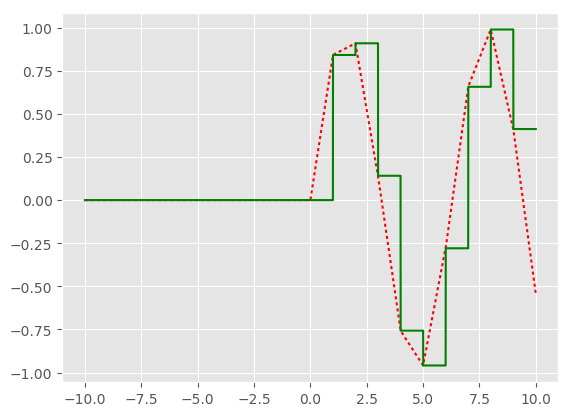

In [42]:
#plt.plot(test.X, test.Y, c="b")
newX = np.arange(-10, 10, 0.001)
plt.plot(newX, test(newX), ":r")
plt.plot(newX, test.step(newX), "-g")

In [43]:
test.step(newX)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,19999
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.412118485242


In [45]:
np.searchsorted(test.x, 1)

1

In [46]:
test.step(0)

mesh1d(data=[ 0.], label="None", unit="%")

In [47]:
import random
from numba import jit

N = 200
myMesh = mesh2d(np.arange(N)*5, [random.uniform(2.5, 10.0) for i in range(N)], x_label="MON Label")

In [53]:
@jit
def _extrapolate(self, X):
    """
    """
    if X <= self.x[0]:
        res = self.y[0] + (X - self.x[0]) *\
            (self.y[1] - self.y[0]) / (self.x[1] - self.x[0])
    elif X >= self.x[-1]:
        res = self.y[-1] + (x - self.x[-1]) *\
            (self.y[-1] - self.y[-2]) / (self.x[-1] - self.x[-2])
    else:
        res = np.interp(X, self.x, self.y)
    return res

In [54]:
%timeit myMesh.extrapolate(255)

24.4 µs ± 381 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [55]:
%timeit _extrapolate(myMesh, 255)

94.1 µs ± 59.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
np.diff(test2.y) / np.diff(test2.x)

0,1,2,3
1.0,-5.0,2.0,1.0


In [58]:
%timeit myMesh.resample(np.arange(-1000, 2000))

47 ms ± 831 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
%timeit myMesh.resample(np.arange(-1000, 2000))

47.9 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%timeit np.interp(np.arange(-1000, 2000), myMesh.x, myMesh.y)

48.5 µs ± 733 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [62]:
X = range(3000)
%timeit np.interp(range(3000), myMesh.x, myMesh.y)

716 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [63]:
myMesh(np.arange(-1000, 2000))

array([  229.27098221,   229.04971796,   228.8284537 , ...,  1360.54409087,
        1361.892048  ,  1363.24000514])

In [64]:
%timeit myMesh(np.arange(-10000, 200000))

2.54 s ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
%timeit myMesh(np.arange(-10000, 200000))

2.45 s ± 54.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
%timeit [myMesh(x) for x in np.arange(-10000, 200000)]

3.38 s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%timeit [myMesh(x) for x in np.arange(-10000, 200000)]

3.27 s ± 57.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(0, 40)

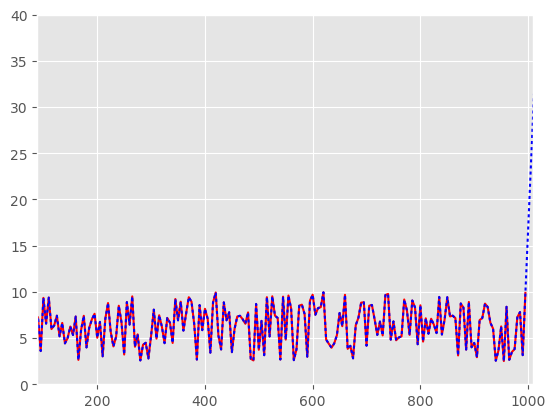

In [73]:
plt.plot(myMesh.x, myMesh.y, 'r')
myNewMesh = myMesh.resample(np.arange(-1000, 2000))
plt.plot(myNewMesh.x, myNewMesh.y, ":b")
plt.xlim(89, 1010)
plt.ylim(0,40)

In [74]:
import urllib
import json
f = urllib.request.urlopen('http://api.wunderground.com/api/Your_Key/geolookup/conditions/q/IA/Cedar_Rapids.json')
json_string = f.read()

In [75]:
json_string

b'\n{\n  "response": {\n  "version":"0.1",\n  "termsofService":"http://www.wunderground.com/weather/api/d/terms.html",\n  "features": {\n  }\n\t\t,\n\t"error": {\n\t\t"type": "keynotfound"\n\t\t,"description": "this key does not exist"\n\t}\n\t}\n}\n'

In [76]:
parsed_json = json.loads(str(json_string))
location = parsed_json['location']['city']
temp_f = parsed_json['current_observation']['temp_f']
print("Current temperature in %s is: %s" % (location, temp_f))
f.close()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [77]:
test2[3]

(4, 4)

In [78]:
test + test2 + test2

x = mesh1d(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], label="None", unit="None")
y = mesh1d(data=[  10.  ,   12.84,   14.91,    4.14,    7.24,    9.04,   11.72,
         14.66,   16.99,   18.41,   19.46,   21.  ,   23.46,   26.42,
         28.99,   30.65,   31.71,   33.04,   35.25,   38.15,   40.91,
         42.84,   43.99,   45.15,   47.09,   49.87,   52.76,   54.96,
         56.27,   57.34,   59.01,   61.6 ,   64.55,   67.  ,   68.53,
         69.57,   71.01,   73.36,   76.3 ,   78.96,   80.75,   81.84,
         83.08,   85.17,   88.02,   90.85,   92.9 ,   94.12,   95.23,
         97.05,   99.74,  102.67,  104.99,  106.4 ,  107.44,  109.  ,
        111.48,  114.44,  116.99,  118.64], label="None", unit="None")

In [79]:
for _a in test:
    print(_a)

(0, 0.0)
(1, 0.8414709848078965)
(2, 0.90929742682568171)
(3, 0.14112000805986721)
(4, -0.7568024953079282)
(5, -0.95892427466313845)
(6, -0.27941549819892586)
(7, 0.65698659871878906)
(8, 0.98935824662338179)
(9, 0.41211848524175659)
(10, -0.54402111088936989)
(11, -0.99999020655070348)
(12, -0.53657291800043494)
(13, 0.42016703682664092)
(14, 0.99060735569487035)
(15, 0.65028784015711694)
(16, -0.2879033166650653)
(17, -0.96139749187955681)
(18, -0.75098724677167605)
(19, 0.14987720966295234)
(20, 0.91294525072762767)
(21, 0.83665563853605596)
(22, -0.0088513092904038762)
(23, -0.84622040417517064)
(24, -0.90557836200662389)
(25, -0.13235175009777303)
(26, 0.7625584504796028)
(27, 0.95637592840450303)
(28, 0.27090578830786904)
(29, -0.66363388421296754)
(30, -0.98803162409286183)
(31, -0.40403764532306502)
(32, 0.55142668124169059)
(33, 0.99991186010726718)
(34, 0.52908268612002385)
(35, -0.42818266949615102)
(36, -0.99177885344311578)
(37, -0.64353813335699939)
(38, 0.29636857870938

In [80]:
test.exportToCSV("/tmp/aze.csv")

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [81]:
# http://stackoverflow.com/questions/24063788/python3-singledispatch-in-class-how-to-dispatch-self-type
from numbers import Number
from functools import singledispatch

class Vector(object):

    def __init__(self):
        self.X = 5
        
    @singledispatch
    def __mul__(self, other):
        return NotImplemented

@Vector.__mul__.register(int)
@Vector.__mul__.register(Vector)                
def _(self, other):
    self.X = self.X * other
    print("gloaaat")
    return self.X

@Vector.__mul__.register(float)
def _(self, other):
    print("gloat")
    self.X = self.X*other*10
    return self.X

In [82]:
class Vector(object):

    def __init__(self):
        self.X = 5
    def __mul__(self, other):
        return _vector_mul(other, self)

@singledispatch
def _vector_mul(other, self):
    return NotImplemented

@_vector_mul.register(int)
def _vector_int_mul(other, self):
    self.X = self.X * other
    print("gloaaat")
    return self.X

@_vector_mul.register(Number)
def _vector_int_mul(other, self):
    self.X = self.X * other
    print("QSD")
    return self.X

@_vector_mul.register(Vector)
def _vector_int_mul(other, self):
    self.X = self.X * other.X
    print("QSOTD")
    return self.X

In [83]:
Vector()*1

gloaaat


5

In [84]:
import seaborn as sns

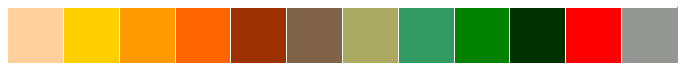

In [8]:
colors = ["#ffcf9c", "#ffcf00", "#ff9a00", "#ff6500", "#9c3000", "#7f6247", "#AAAA63", "#319a63", "#008200", "#003000", "#ff0000", "#949694"]
sns.palplot(sns.color_palette(colors, 12))

## Polymesh2d

In [85]:
class myRecArray(np.ndarray):
    def __new__(cls, data=None, label=None, unit=None):
        # We first cast to be our class type
        x = data[0]
        print(x)
        y = mesh1d(data[1], label="mon label", unit="mon unité")
        obj = np.rec.array([x, y], dtype=[('X', mesh1d),('Y', mesh1d)]).view(cls)
#        obj = np.asarray(data).view(cls)
        obj.label = label
        obj.unit = unit

        return obj

    def __array_finalize__(self, obj):
        # see InfoArray.__array_finalize__ for comments
        self.unit = getattr(obj, 'unit', None)
        self.label = getattr(obj, 'label', None)

#    def __numpy_ufunc__(max, myMax)


In [86]:
A = np.rec.array([mesh1d(np.arange(4)), mesh1d([1, 51, 10, 45])], dtype=[('X', mesh1d),('Y', mesh1d)]) #.view(cls)

In [87]:
A.X

array([0, 1, 2, 3], dtype=object)

In [88]:
A = myRecArray([[1, 51, 10, 45], np.arange(4)], unit="mon unité")

[1, 51, 10, 45]


ValueError: Setting void-array with object members using buffer.

In [89]:
A

rec.array([(0, 1), (1, 51), (2, 10), (3, 45)], 
          dtype=[('X', 'O'), ('Y', 'O')])

In [90]:
A[0]

(0, 1)

## mesh3d

In [91]:
from scipy.interpolate import dfitpack, fitpack

In [92]:
%%timeit 

_, tx, _, ty, c, _, _ = dfitpack.regrid_smth(m3d._X, m3d._Y, np.ravel(m3d.W), kx=1, ky=1)
fitpack.bisplev(12,2.5,(tx, ty, c, 1, 1))

NameError: name 'm3d' is not defined

In [35]:
def extrapolate(self, X, Y):
    if X <= self.X[0]:
        iX = 0
    elif X >= self.X[-1]:
        iX = -2
    else:
        iX = np.searchsorted(self.X, X) - 1

    if Y <= self.Y[0]:
        iY = 0
    elif Y >= self.Y[-1]:
        iY = -2
    else:
        iY = np.searchsorted(self.Y, Y) - 1

    Z1 = self.W[iX, iY] + (self.W[iX, iY+1] - self.W[iX, iY]) * \
        (Y - self.Y[iY]) / (self.Y[iY+1] - self.Y[iY])
    Z2 = self.W[iX+1, iY] + (self.W[iX+1, iY+1] - self.W[iX+1, iY]) * \
        (Y - self.Y[iY]) / (self.Y[iY+1] - self.Y[iY])

    return Z1 + (Z2 - Z1) * (X - self.X[iX]) / (self.X[iX+1] - self.X[iX])

In [45]:
def interpolate(self, X, Y):
    if X <= self.X[0]:
        return np.interp(Y, self.Y, self.W[0])
    elif X >= self.X[-1]:
        return np.interp(Y, self.Y, self.W[-1])
    else:
        iX = np.searchsorted(self.X, X) - 1

    if Y <= self.Y[0]:
        return np.interp(X, self.X, self.W[:,0])
    elif Y >= self.Y[-1]:
        return np.interp(X, self.X, self.W[:,-1])
    else:
        iY = np.searchsorted(self.Y, Y) - 1

    Z1 = self.W[iX, iY] + (self.W[iX, iY+1] - self.W[iX, iY]) * \
        (Y - self.Y[iY]) / (self.Y[iY+1] - self.Y[iY])
    Z2 = self.W[iX+1, iY] + (self.W[iX+1, iY+1] - self.W[iX+1, iY]) * \
        (Y - self.Y[iY]) / (self.Y[iY+1] - self.Y[iY])

    return Z1 + (Z2 - Z1) * (X - self.X[iX]) / (self.X[iX+1] - self.X[iX])

In [51]:
%timeit interpolate(m3d, 15,1)

The slowest run took 4.53 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.4 µs per loop


np.diff(m3d.W[1:3,2:4], axis=1)

In [17]:
%timeit np.diff(m3d.W[1:3,2:4], axis=1)

100000 loops, best of 3: 15.2 µs per loop


In [23]:
%timeit m3d.W[1:3,3] - m3d.W[1:3,2]

The slowest run took 5.83 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.7 µs per loop


In [15]:
np.diff(m3d.W[1:3,2:4], axis=0)

array([[-36., -39.]])

In [95]:
m3d = mesh3d(np.arange(100),np.arange(50),np.random.random((50,100)))

In [ ]:
def extrapolate(self, X, Y):
        iX = 0
        iY = 0

        if X <= self.X[0]:
            iX = 0
        elif X >= self.X[-1]:
            iX = -2
        else:
            iX = np.where(self.X < X)[0][-1]

        if Y <= self.Y[0]:
            iY = 0
        elif Y >= self.Y[-1]:
            iY = -2
        else:
            iY = np.where(self.Y < Y)[0][-1]

        Z1 = self.W[iY, iX] + (self.W[iY, iX+1] - self.W[iY, iX]) * \
            (X - self.X[iX]) / (self.X[iX+1] - self.X[iX])
        Z2 = self.W[iY+1, iX] + (self.W[iY+1, iX+1] - self.W[iY+1, iX]) * \
            (X - self.X[iX]) / (self.X[iX+1] - self.X[iX])

        return Z1 + (Z2 - Z1) * (Y - self.Y[iY]) / (self.Y[iY+1] - self.Y[iY])

def extrapolate1(self, _X, _Y):
    xNew = np.searchsorted(self.X, _X).clip(1, len(self.X)-1).astype(int)
    yNew = np.searchsorted(self.Y, _Y).clip(1, len(self.Y)-1).astype(int)

    # 4. Calculate the slope of regions that each X value falls in.
    xLo, xHi = xNew - 1, xNew
    yLo, yHi = yNew - 1, yNew

    x11 = self.X[xLo]
    x12 = self.X[xHi]
    y11 = self.Y[yLo]
    y21 = self.Y[yHi]
    w11 = self.W[:,xLo]
    w12 = self.W[:,xHi]
    
    # Note that the following two expressions rely on the specifics of the
    # broadcasting semantics.
    xSlope = (w12 - w11) / (x12 - x11)

    # 5. Calculate the actual value for each entry in X.
    yNew = xSlope * (_X - x11) + w11
    
    w11 = yNew[yLo]
    w21 = yNew[yHi]
    
    ySlope = (w21 - w11) / (y21 - y11)

    yNew = ySlope * (_Y - y11) + w11

    return np.array(yNew)

def extrapolate2(self, X, Y):

    iX = -2 if X >= self.X[-1] else \
        np.searchsorted(self.X, X).clip(1, len(self.X)-1).astype(int) - 1

    iY = -2 if Y >= self.Y[-1] else \
        np.searchsorted(self.Y, Y).clip(1, len(self.Y)-1).astype(int) - 1

    Z1 = self.W[iY, iX] + (self.W[iY, iX+1] - self.W[iY, iX]) * \
        (X - self.X[iX]) / (self.X[iX+1] - self.X[iX])
    Z2 = self.W[iY+1, iX] + (self.W[iY+1, iX+1] - self.W[iY+1, iX]) * \
        (X - self.X[iX]) / (self.X[iX+1] - self.X[iX])

    return Z1 + (Z2 - Z1) * (Y - self.Y[iY]) / (self.Y[iY+1] - self.Y[iY])

In [140]:
def extrapolate3(self, X, Y):
    gc.disable()
    st = time.time()


    if X <= self.X[0]:
        iX = 0
    elif X >= self.X[-1]:
        iX = -2
    else:
        iX = np.searchsorted(self.X, X) - 1

    if Y <= self.Y[0]:
        iY = 0
    elif Y >= self.Y[-1]:
        iY = -2
    else:
        iY = np.searchsorted(self.Y, Y) - 1

    Z1 = self.W[iY, iX] + (self.W[iY, iX+1] - self.W[iY, iX]) * \
        (X - self.X[iX]) / (self.X[iX+1] - self.X[iX])
    Z2 = self.W[iY+1, iX] + (self.W[iY+1, iX+1] - self.W[iY+1, iX]) * \
        (X - self.X[iX]) / (self.X[iX+1] - self.X[iX])

    return Z1 + (Z2 - Z1) * (Y - self.Y[iY]) / (self.Y[iY+1] - self.Y[iY])

In [137]:
t = []
%timeit -o extrapolate(m3d, 10, 7.5)
t.append(_.worst)
%timeit -o extrapolate1(m3d, 10, 7.5)
t.append(_.worst)



10000 loops, best of 3: 58.4 µs per loop


AttributeError: 'list' object has no attribute 'worst'